<a href="https://colab.research.google.com/github/Sejal-N/Heart-Disease-Diagnostic-Analysis-using-Tableau/blob/main/Unified_Mentor_Project_10_Heart_Disease_Diagnostic_Analysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Diagnostic Analysis

Project Title: Heart Disease Diagnostic Analysis

Technologies: Data Science

Domain: Healthcare

In [1]:
#importing various packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#reading the dataset
df=pd.read_csv('/content/Heart Disease data.csv')

In [5]:
#Shape of data
df.shape

(1025, 14)

In [6]:
#checking the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [8]:
#Columns name of dataset
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#Exploratory Data Analysis

In [12]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


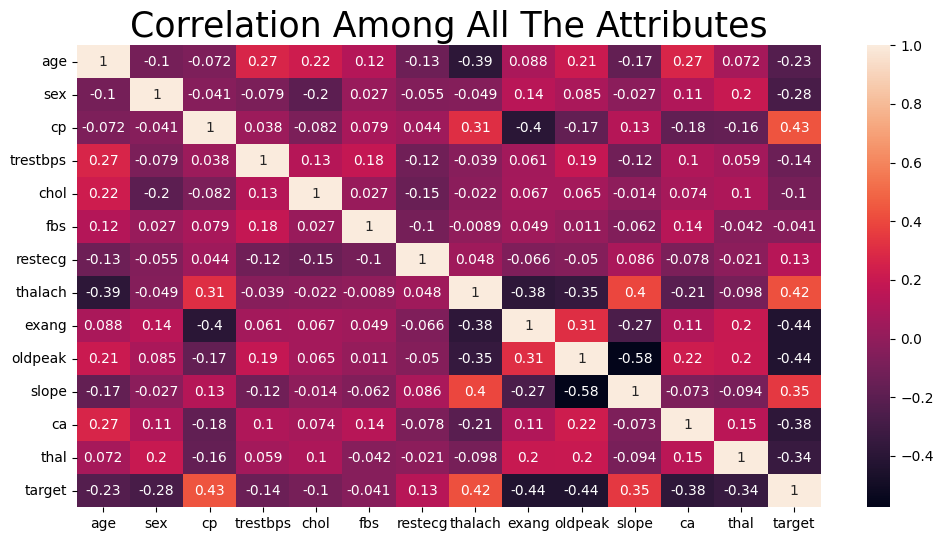

In [13]:
#Correlation amaong all the Attributes
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Among All The Attributes",fontsize=25)
plt.show()

# Data Visualization

#### 1.Countplot

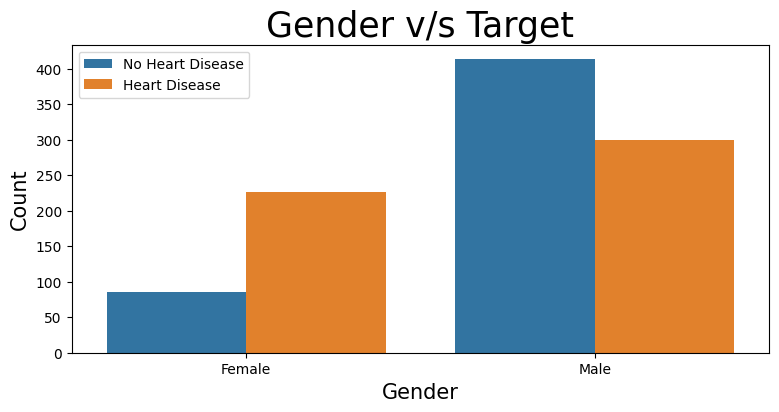

In [16]:
plt.figure(figsize = (9,4))
sns.countplot(x ='sex', hue= 'target', data=df)
plt.title("Gender v/s Target",fontsize=25)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks([0,1],['Female','Male'])
plt.legend(['No Heart Disease','Heart Disease'])
plt.show()

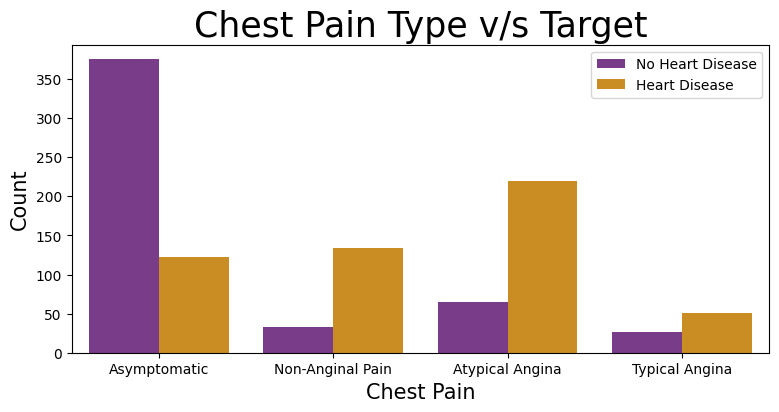

In [15]:
plt.figure(figsize = (9,4))
sns.countplot(x='cp', hue='target', data=df, palette= 'CMRmap')
plt.title("Chest Pain Type v/s Target", fontsize=25)
plt.xlabel('Chest Pain', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks([3,2,1,0],['Typical Angina','Atypical Angina','Non-Anginal Pain','Asymptomatic'])
plt.legend(['No Heart Disease','Heart Disease'])
plt.show()

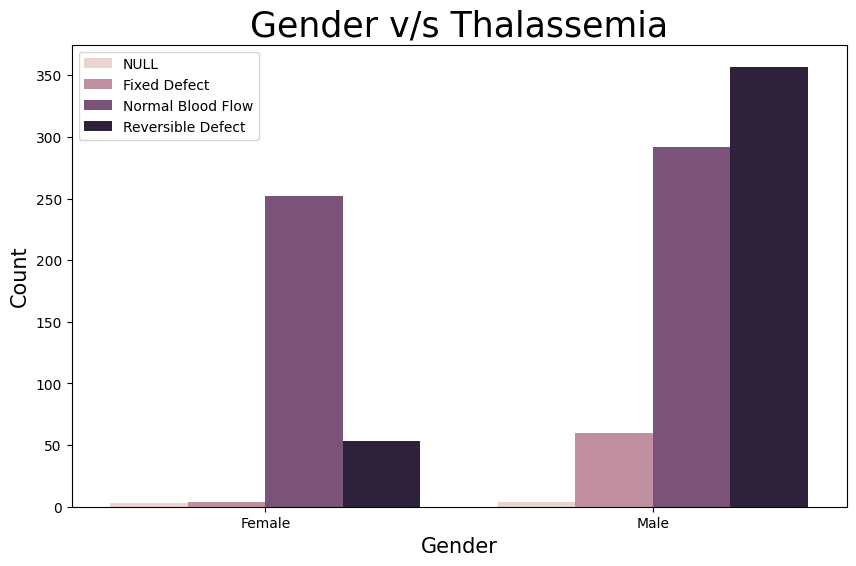

In [17]:
plt.figure(figsize = (10,6))
sns.countplot(x ='sex', hue= 'thal', data=df)
plt.title("Gender v/s Thalassemia",fontsize=25)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks([0,1],['Female','Male'])
plt.legend(['NULL','Fixed Defect','Normal Blood Flow','Reversible Defect'])
plt.show()

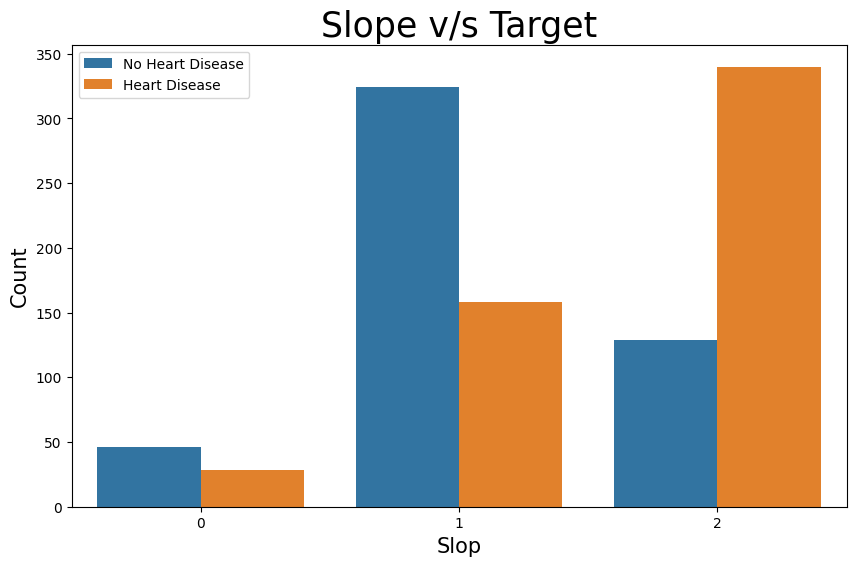

In [18]:
plt.figure(figsize = (10,6))
sns.countplot(x ='slope', hue= 'target', data=df)
plt.title("Slope v/s Target",fontsize=25)
plt.xlabel('Slop',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(['No Heart Disease','Heart Disease'])
plt.show()

<ipython-input-21-c06f11d65c06>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  sns.countplot(x ='exang', hue= 'thal', data=df, color= 'green')


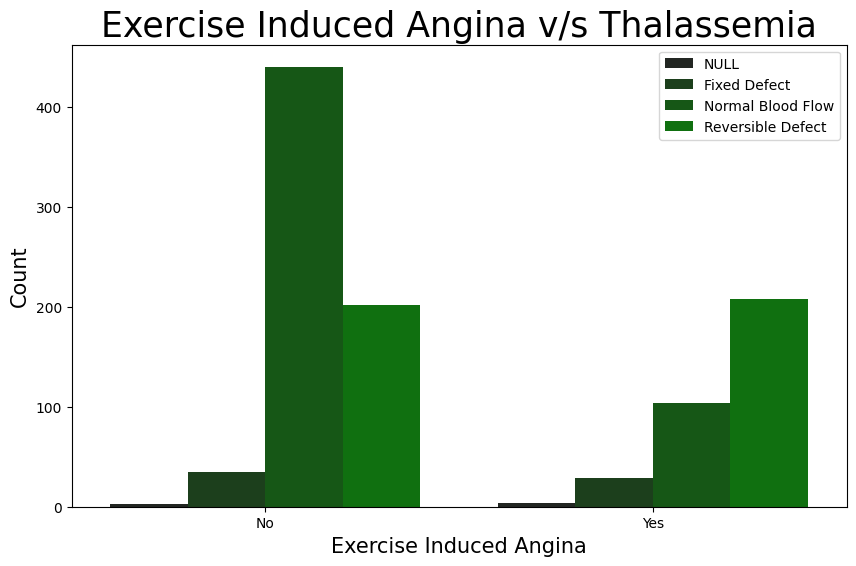

In [21]:
plt.figure(figsize = (10,6))
sns.countplot(x ='exang', hue= 'thal', data=df, color= 'green')
plt.title("Exercise Induced Angina v/s Thalassemia",fontsize=25)
plt.xlabel('Exercise Induced Angina',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks([0,1],['No','Yes'])
plt.legend(['NULL','Fixed Defect','Normal Blood Flow','Reversible Defect'])
plt.show()

#### 2.Displot

<Figure size 2000x1500 with 0 Axes>

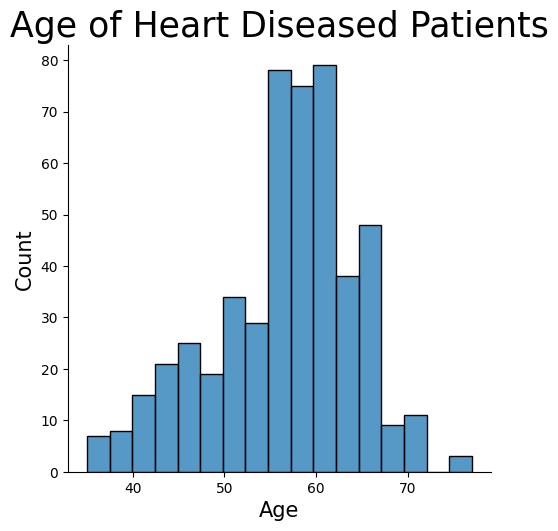

In [30]:
plt.figure(figsize=(20,15))
sns.displot(df[df['target']==0]['age'])
plt.title('Age of Heart Diseased Patients',fontsize=25)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

<Figure size 2000x1500 with 0 Axes>

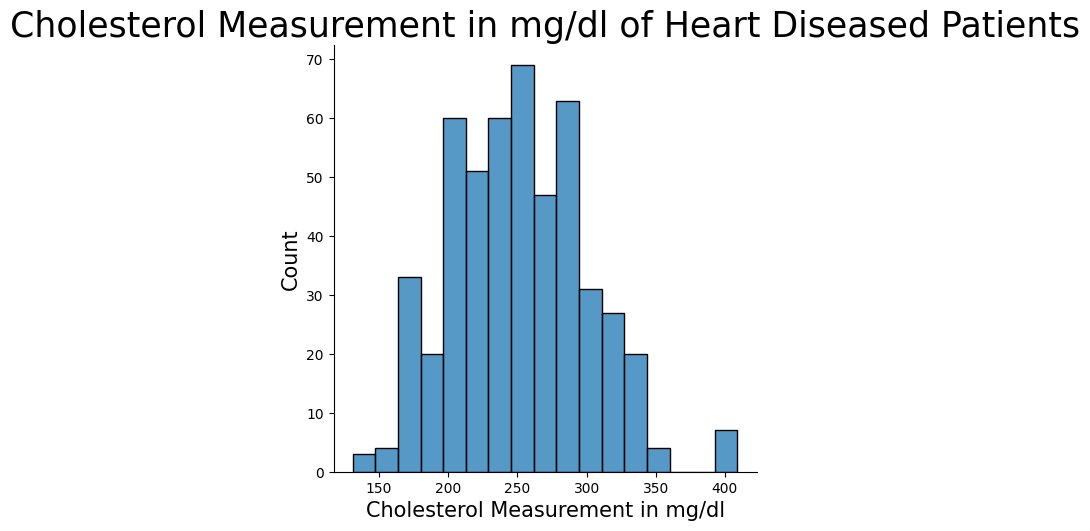

In [31]:
plt.figure(figsize=(20,15))
sns.displot(df[df['target']==0]['chol'])
plt.title('Cholesterol Measurement in mg/dl of Heart Diseased Patients',fontsize=25)
plt.xlabel('Cholesterol Measurement in mg/dl',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

<Figure size 2000x1500 with 0 Axes>

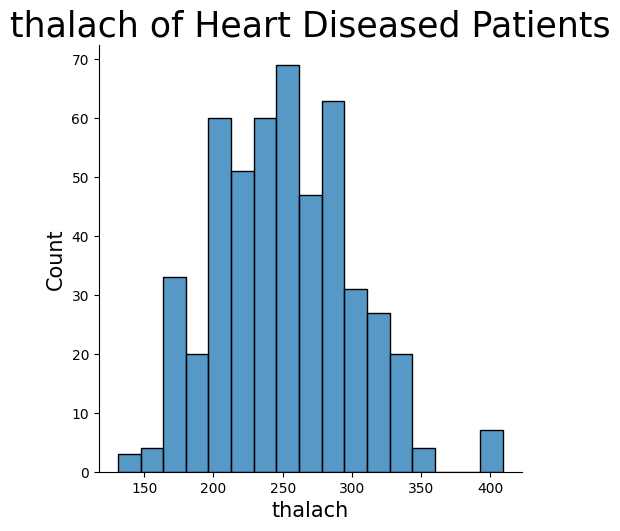

In [32]:
plt.figure(figsize=(20,15))
sns.displot(df[df['target']==0]['chol'])
plt.title('thalach of Heart Diseased Patients',fontsize=25)
plt.xlabel('thalach',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

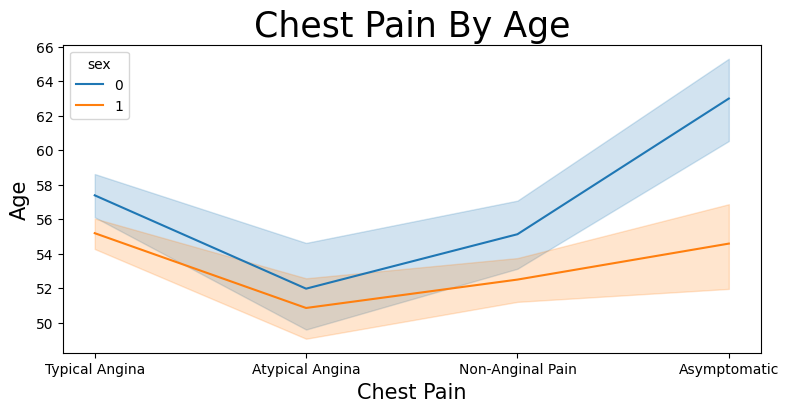

In [33]:
plt.figure(figsize = (9,4))
sns.lineplot(x='cp', data=df, y= 'age', hue='sex')
plt.title("Chest Pain By Age", fontsize=25)
plt.xlabel('Chest Pain', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.xticks([0,1,2,3],['Typical Angina','Atypical Angina','Non-Anginal Pain','Asymptomatic'])
plt.show()

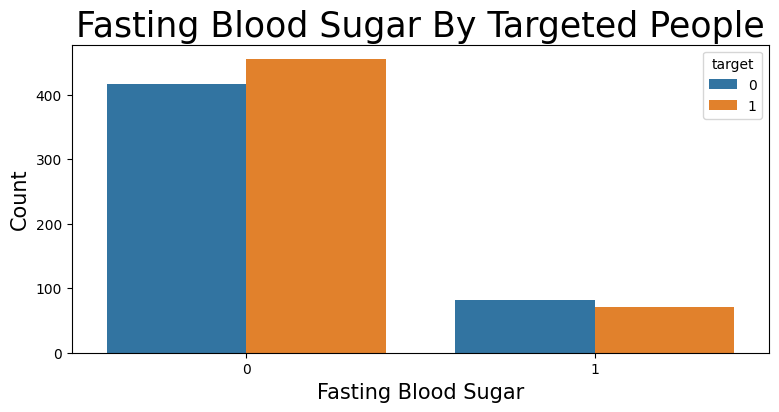

In [34]:
plt.figure(figsize = (9,4))
sns.countplot(x='fbs', data=df, hue='target')
plt.title("Fasting Blood Sugar By Targeted People", fontsize=25)
plt.xlabel('Fasting Blood Sugar', fontsize=15)
plt.ylabel('Count', fontsize = 15)
plt.show()

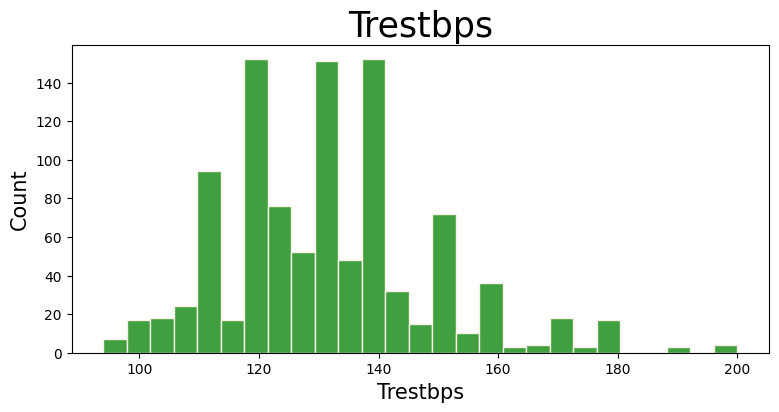

In [35]:
plt.figure(figsize = (9,4))

sns.histplot(data= df ,x = 'trestbps', color = 'Green',
             edgecolor = 'linen')

plt.title("Trestbps", fontsize=25)
plt.xlabel('Trestbps', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

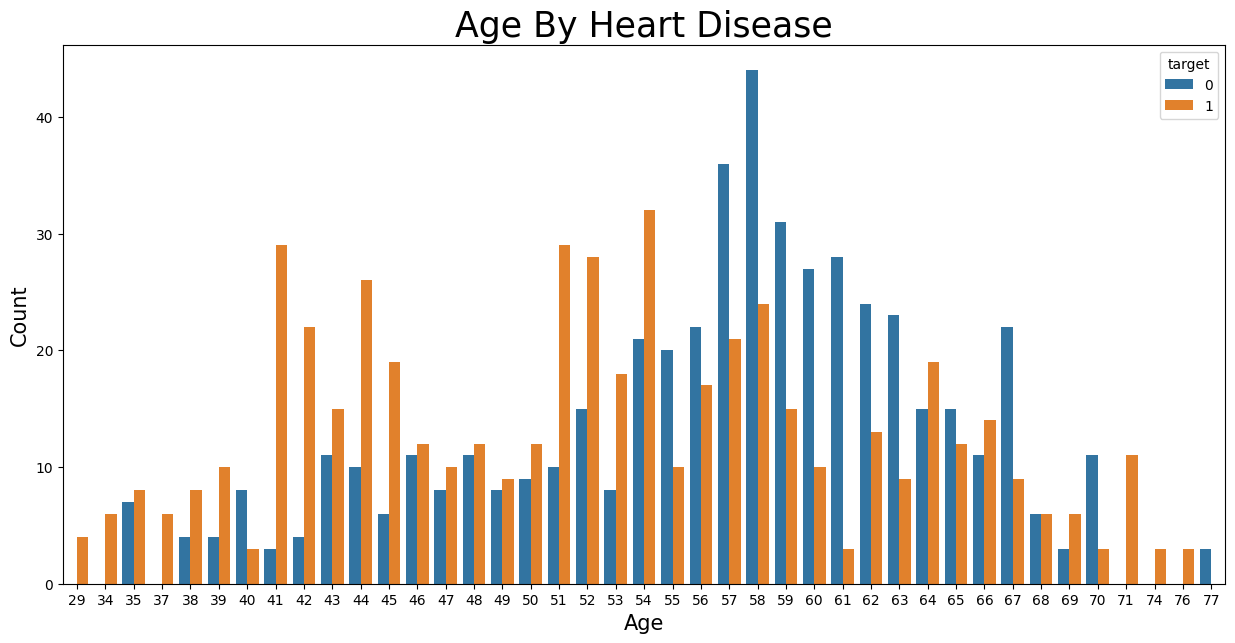

In [36]:
plt.figure(figsize = (15,7))
sns.countplot(x='age', data=df, hue='target')
plt.title("Age By Heart Disease", fontsize=25)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

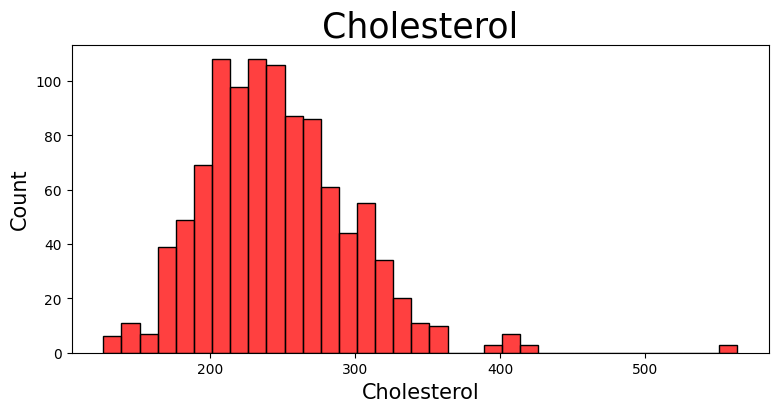

In [37]:
plt.figure(figsize = (9,4))

sns.histplot(data= df ,x = 'chol', color = 'Red')

plt.title("Cholesterol", fontsize=25)
plt.xlabel('Cholesterol', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

**END OF PROJECT**